# Búsqueda de raices

## Introducción

Un problema habitual en ingeniería es el siguiente: dada una función $f(x)$, se desea determinar los valores de $x$ para los que $f(x) = 0$. Las soluciones se conocen como *raíces* de la ecuación $f (x) = 0$, o *ceros* de la función $f (x)$.

Antes de continuar, vamos a repasar el concepto de función. La ecuación
$$
y = f(x)
$$
contiene tres elementos: un valor de entrada $x$, un valor de salida $y$, y la *regla* $f$ para obtener $y$. Se dice que la función está dada si se especifica la regla $f$. En informática, esta regla es un algoritmo. Puede ser simplemente una función real de variable real como
$$
f(x) = \cosh(x) \cos(x) - 1
$$
o un procedimiento complejo que contenga cientos o miles de líneas de código. Siempre que el algoritmo produzca una salida $y$ para cada entrada $x$, se considera que es una función.

En general, una ecuación puede tener cualquier número de raíces (reales) o ninguna.
Por ejemplo,
$$
\text{sen}(x) - x = 0
$$
tiene una sola raíz ($x = 0$), mientras que
$$
\tan(x) - x = 0
$$
tiene un número infinito de raíces ($x = 0, \pm 4,493, \pm 7,725, \dots$).

**Todos los métodos de búsqueda de raíces son iterativos**. Por tanto, requieren un punto de partida, un valor inicial como estimación de la raíz buscada. Esta estimación es crucial, ya que un mal valor de partida puede provocar que el algoritmo no converja, o puede converger a una raíz "equivocada" (una raíz diferente de la buscada). No existe una receta universal para estimar el valor inicial de una raíz. Si la ecuación está asociada a un problema físico, el contexto del problema (*visión física*) puede sugerir la ubicación aproximada de la raíz. De lo contrario, se puede iniciar una búsqueda numérica de las raíces de forma sistemática. Uno de estos métodos de búsqueda se describe en la siguiente sección. Otra forma de localizar en qué región aparecerán las raíces es dibujar la función, pero se trata de un procedimiento visual que no se puede programar.

Es muy recomendable *acotar* dónde estará la raíz (determinar sus límites inferior y superior) antes de pasar el problema a un algoritmo de búsqueda de la raíz. De hecho, en la mayoría de los métodos descritos en este capítulo, esta acotación será obligatoria.

## Convergencia

Sea $\alpha$ una raíz de una función $f$ (esto es, $f(\alpha) = 0$). Sea $x_n$ la sucesión de candidatos a aproximar $\alpha$, obtenidos mediante la aplicación de un cierto método iterativo. Se dice que el método converge si $\lim _{n \rightarrow \infty} x_n=\alpha$. Si se define la sucesión de errores $\left(e_n\right)$ mediante $e_n=\alpha-x_n$, entonces también se dice que el método iterativo converge si $\lim _{n \rightarrow \infty} e_n=0$. 

### Orden de convergencia
Un método iterativo converge con orden $p$ si existe un número $p \in \mathbb{R}$ y una constante $0<C<\infty$ tales que
$$
\lim _{n \rightarrow \infty} \frac{\left|e_{n+1}\right|}{\left|e_n\right|^p}=C \text {. }
$$
$C$ recibe el nombre de *constante de error asintótica*. El orden de convergencia del método define la velocidad de convergencia de la sucesión. Si es $p=1$ se dice que la convergencia es lineal, y entonces se requiere que sea $C<1$ ( $C$ define ahora la velocidad de convergencia de la sucesión). Si es $p=2$ se dice que la convergencia es cuadrática. Nótese que para $n$ suficientemente grande se verifica $\left|e_{n+1}\right| \approx C\left|e_n\right|^p$, o también $\log \left|e_{n+1}\right| \approx p \log \left|e_n\right|$. Si para un valor dado de $q$ es $\lim _{n \rightarrow \infty}\left|e_{n+1}\right| /\left|e_n\right|^q=0$, entonces el orden de convergencia es mayor que $q$.

### Estimación del error y de la velocidad de convergencia
Dado un método iterativo convergente es necesario estimar el error $\left|\alpha-x_n\right| /|\alpha|$ que se comete con la aproximación $x_n$. Por otra parte, como veremos a continuación, esta estimación depende del parámetro que determina la velocidad de convergencia del método: orden de convergencia $p$ si la convergencia es superlineal, o constante asintótica de error $C$ si $p=1$.

Por tanto debemos tener un procedimiento para estimar $p$ (y $C$ si es $p=1$ ) y el error $\left|x_n-\alpha\right| /|\alpha|$. Para ello disponemos únicamente de las aproximaciones sucesivas generadas en el proceso iterativo.

#### Convergencia superlineal $(p>1)$

En este caso,

$$
\lim _{n \rightarrow \infty} \frac{\left|e_{n+1}\right|}{\left|e_n\right|^p}=C
$$

Sea $\Delta x_{n+1}=x_{n+1}-x_n=e_n-e_{n+1}$. Se demuestra también que
$$
\lim \frac{\left|\Delta x_{n+1}\right|}{\left|\Delta x_n\right|^p}=C
$$
de donde
$$
p \approx \frac{\log \left|\Delta x_{n+1}\right|}{\log \left|\Delta x_n\right|}
$$
para $n$ suficientemente grande.

La convergencia superlineal también puede detectarse calculando los cocientes $\left|\Delta x_{n+1}\right| /\left|\Delta x_n\right|$ ya que si es $p>1$ entonces
$$
\lim \frac{\left|\Delta x_{n+1}\right|}{\left|\Delta x_n\right|}=\lim \frac{\left|e_n\right|}{\left|e_{n-1}\right|}=0
$$

Para **estimar el error** relativo de una aproximación $x_n$, se demuestra que:
$$
\frac{\left|\alpha-x_n\right|}{|\alpha|} \approx \frac{\left|x_{n+1}-x_n\right|}{\left|x_{n+1}\right|},
$$
lo que permite utilizar el error relativo entre las aproximaciones sucesivas $x_{n+1}$ y $x_n$ como una buena estimación del error de la aproximación $x_n$.

#### Convergencia lineal $(p=1)$
Ahora se tiene que 
$$
\lim _{n \rightarrow \infty} \frac{\left|e_{n+1}\right|}{\left|e_n\right|}=C<1
$$
Aquí también puede demostrarse que
$$
\lim \frac{\left|\Delta x_{n+1}\right|}{\left|\Delta x_n\right|}=C .
$$

Es decir, la velocidad de convergencia lineal puede estimarse mediante
$$
C \approx \frac{\left|\Delta x_{n+1}\right|}{\left|\Delta x_n\right|}
$$

Observa que también se verifica $\frac{\log \left|\Delta x_{n+1}\right|}{\log \left|\Delta x_n\right|} \approx 1$ lo que permite utilizar la relación $p \approx \log \left|\Delta x_{n+1}\right| / \log \left|\Delta x_n\right|$ para estimar $p$ incluso cuando la convergencia es lineal.

Para **estimar el error** relativo de una aproximación $x_n$, se demuestra que la relación
$$
\left|\frac{\alpha-x_{n+1}}{\alpha}\right| \approx \frac{C}{1-C}\left|\frac{x_{n+1}-x_n}{x_{n+1}}\right|
$$
constituye una estimación "segura" del error relativo.

Nótese que si $C \approx 1 / 2$ esta estimación es aproximadamente igual al error relativo entre dos aproximaciones sucesivas, pero si $C \approx 1$ la situación es totalmente distinta: debido al factor $1 /(1-C)$ valores de $x_{n+1}$ y $x_n$ muy próximos no aseguran que $\alpha$ y $x_{n+1}$ también lo estén. Esto debe tenerse especialmente en cuenta para el diseño de los criterios de parada en métodos iterativos lineales.

## Método de búsqueda incremental

La mejor manera de determinar la ubicación aproximada de las raíces es dibujar la función. A menudo, una gráfica aproximada basada en unos pocos puntos, es suficiente para proporcionar valores de partida razonables. Otra herramienta útil para detectar y acotar las raíces es el método de búsqueda incremental. También se puede adaptar para calcular las raíces, pero el esfuerzo no merecería la pena, ya que otros métodos descritos en este capítulo son más eficaces para esa tarea. Por tanto, este método suele usarse para la búsqueda de las cotas de la solución a buscar, que servirán de *input* para otros métodos.

La idea básica del método de búsqueda incremental es sencilla: Si $f (x_1)$ y $f (x_2)$ tienen signos opuestos y $f(x)$ es continua en $(x_1, x_2)$, entonces hay al menos una raíz en el intervalo $(x_1, x_2)$. Si el intervalo es lo suficientemente pequeño, es probable que contenga una sola raíz. Así, los ceros de $f (x)$ pueden detectarse evaluando la función en intervalos $\Delta x$ y buscando un cambio de signo.

Hay varios problemas potenciales con el método de búsqueda incremental:

 - Es posible pasar por alto raíces muy próximas si el *paso* de búsqueda $\Delta x$ es mayor que el espaciado entre las raíces.
 - Las raíces dobles (dos raíces que coinciden) no se detectarán.
 - Algunas singularidades de $f(x)$ pueden confundirse con raíces. Por ejemplo, $f (x) = \tan x$ cambia de signo en $x = \pm \frac{1}{2} n \pi , \, n = 1, 3, 5, \dots$, como se muestra en la figura siguiente. Sin embargo, estos puntos no son raíces, porque la función no cruza el eje $x$.

<center>
<div>
<img src="https://drive.upm.es/index.php/apps/files_sharing/ajax/publicpreview.php?x=1920&y=465&a=true&file=tanx.png&t=cWaTQTmw5GYnNVu&scalingup=0" width="280"/>
</div>
</center>


**Ejercicio 1 -** Implementa una función ```incremental_root_search(f, a, b, dx)```. Esta función debe buscar el intervalo donde se halla un cero de la función ```f``` suministrada por el usuario en el dominio ```(a, b)``` en incrementos de ```dx```. Utiliza el algoritmo de búsqueda incremental descrito anteriormente. La función debe devolver los límites $(x_1, x_2)$ entre los que se encuentra la raíz si la búsqueda tuvo éxito, y $x_1 = x_2 = \texttt{None}$ si no se detectó ninguna raíz. En el caso de querer encontrar más de una raíz, una vez detectada la primera (la más cercana a $a$), se puede volver a llamar a la función sustituyendo $a$ por $x_2$ para encontrar la siguiente raíz. Esto puede repetirse siempre que se detecte una raíz nueva.

**Ejercicio 2 -** El siguiente bloque de código busca la raíz de $x^3 - 10x^2 + 5 = 0$ que cae en el intervalo $(0,1)$, con una precisión de cuatro cifras significativas. Haz uso de la función escrita en el ejercicio anterior, así que primero deberás resolver dicho ejercicio. El algoritmo implementado se basa en la búsqueda incremental, pero en lugar de recorrer el intervalo $(0,1)$ con incrementos de $\Delta x = 0.0001$ (sería el paso necesario teóricamente para conseguir una precisión de cuatro cifras significativas), implementa otra lógica para recorrer dicho intervalo. Analiza el algoritmo y describe las ventajas e inconvenientes que le ves frente al procedimiento estándar descrito anteriormente.

## Método de la bisección

Una vez que se ha acotado una raíz de $f(x) = 0$ en el intervalo $(x_1 , x_2)$, se pueden utilizar varios métodos para acercarse a ella. El método de la bisección lo consigue reduciendo sucesivamente el intervalo a la mitad hasta que sea lo suficientemente pequeño. La bisección no es el método más rápido disponible para calcular las raíces, pero es el más fiable. Una vez que se ha acotado una raíz, el método de la bisección siempre convergerá a ella.
Esta técnica utiliza el mismo principio que el de la búsqueda incremental: si $f(x_1)$ y $f(x_2)$ tienen signos opuestos, entonces habrá una raíz en el intervalo $(x_1, x_2)$. Para reducir el intervalo a la mitad, calculamos $f(x_3)$, donde $x_3 = \frac{1}{2} (x_1 + x_2)$ es el punto medio del intervalo. Si $f(x_2)$ y $f(x_3)$ tienen signos opuestos, entonces la raíz debe estar en $(x_2, x_3)$, y por tanto avanzamos sustituyendo la cota original $x_1$ por $x_3$. En caso contrario, la raíz se encuentra en $(x_1, x_3)$, en cuyo caso se sustituye $x_2$ por $x_3$. De cualquier forma, el nuevo intervalo $(x_1, x_2)$ es la mitad del tamaño del intervalo original. La bisección se repite hasta que el intervalo se haya reducido por debajo de un valor pequeño $\varepsilon$, de modo que

$$
\left| x_2 - x_1 \right| < \varepsilon
$$
Es fácil calcular el número de bisecciones necesarias para alcanzar un valor del error prefijado $\varepsilon$. El intervalo original $\Delta x$ se reduce a $\Delta x / 2$ después de una bisección, $\Delta x / 2^2$ después de dos bisecciones, y después de $n$ bisecciones es $\Delta x / 2^n$ . Fijando $\Delta x / 2^n < \varepsilon$ y resolviendo para $n$, obtenemos

$$
n=\frac{\ln (\Delta x / \varepsilon)}{\ln 2}
$$

Como $n$ debe ser un número entero, se utiliza el entero por arriba más proximo.

La convergencia del método de la bisección es lineal (el error se va reduciendo linealmente con cada iteración).

**Ejercicio 3 -** Programa una función ```bisection(f, x1, x2, tol)``` que implemente el método de la bisección. Los argumentos deben ser la función ```f``` sobre la que buscar la raíz, el intervalo ```(x1, x2)``` que acota la raíz y la tolerancia objetivo. Recuerda que, en este método, se puede predecir de antemano el número de iteraciones necesarias.

**Ejercicio 4 -** Utiliza la función programada en el ejercicio anterior para encontrar la raíz de $x^3 - 10x^2 + 5 = 0$ que cae en el intervalo $(0, 1)$ con una precisión de cuatro cifras significativas (este problema ya se resolvió con el algoritmo de búsqueda incremental). ¿Cuántas evaluaciones de la funciones serán necesarias?

## Métodos basados en la interpolación lineal

### Métodos de la secante y de la *regula falsi*
Los métodos de la secante y de la *regula falsi* (*falsa posición*) están estrechamente relacionados. Ambos métodos requieren dos estimaciones iniciales de la raíz, $x_1$ y $x_2$. Se supone que la función $f(x)$ es aproximadamente lineal cerca de la raíz, de modo que el valor mejorado $x_3$ de la raíz puede estimarse por interpolación lineal entre $x_1$ y $x_2$. 

Ahora observa la siguiente figura:

<center>
<div>
<img src="https://drive.upm.es/index.php/apps/files_sharing/ajax/publicpreview.php?x=1920&y=465&a=true&file=secante.png&t=Wzni5Swvrp9Fe0Z&scalingup=0" width="380"/>
</div>
</center>

Los triángulos similares (sombreados sobre la figura) dan lugar a la relación
$$
\frac{f_2}{x_3-x_2}=\frac{f_1-f_2}{x_2-x_1}
$$

donde se ha utilizado la notación $f_i = f\left(x_i\right)$. Así, la estimación mejorada de la raíz es
 
$$
x_3=x_2-f_2 \frac{x_2-x_1}{f_2-f_1}
$$

El método de la *regula falsi* requiere que $x_1$ y $x_2$ acoten la raíz superior e inferiormente. Después de calcular la estimación mejorada de la raíz ($x_3$), se sustituye $x_1$ o $x_2$ por $x_3$. Si $f_3$ tiene el mismo signo que $f_1$, se hace que $x_1 \leftarrow x_3$; en caso contrario, se hace $x_2 \leftarrow x_3$. De esta manera, la raíz siempre queda acotada entre $x_1$ y $x_2$. Este proceso se repite hasta la convergencia.

El método de la secante difiere del método de la *regula falsi* en dos aspectos: no requiere el acotamiento inicial de la raíz, y descarta siempre la estimación previa más antigua de la raíz (es decir, después de calcular $x_3$, se hace $x_1 \leftarrow x_2$ y $x_2 \leftarrow x_3$).

Se puede demostrar que la convergencia del método secante es superlineal ($p=1.618$). El orden exacto de convergencia del método de la *regula falsi* es imposible de calcular de forma genérica, aunque suele ser algo mejor que el lineal (pero no por mucho). Sin embargo, como el método de la *regula falsi* siempre acota la raíz, es más fiable.

**Ejercicio 5 -** Programa una función que implemente el método de la *regula falsi*

**Ejercicio 6 -** Programa una función que implemente el método de la secante.

**Ejercicio 7 -** Realiza experimentos numéricos para probar que la convergencia del método de la secante es mejor que la de la *regula falsi* o el método de la bisección. Utiliza como función de prueba $x^3 - 10x^2 + 5 = 0$.

**Ejercicio 8 -** Piensa en funciones que pueden ser problemáticas a la hora de encontrar sus raíces por los métodos anteriores. ¿Qué circunstancias deben darse para que los métodos anteriores fallen en dichas funciones?


### Método Ridder
El método de Ridder es una modificación inteligente del método de la *regula falsi*. Suponiendo que la raíz buscada está acotada por $x_1$ y $x_2$, primero calculamos $f_3 = f (x_3)$, donde $x_3$ es el punto medio del intervalo ($x_1, x_2$), como se indica en la figura siguiente.

<center>
<div>
<img src="https://drive.upm.es/index.php/apps/files_sharing/ajax/publicpreview.php?x=1920&y=465&a=true&file=Ridder1.png&t=OJiXwXIAZ6uwrkr&scalingup=0" width="320"/>
</div>
</center>

A continuación, se combina la función $f(x)$ con una exponencial de manera que en la función resultante $g(x)$ los tres puntos $x_1$ $x_2$ y $x_3$ estén alineados. Más concretamente, se introduce la función

$$
g(x)=f(x) e^{\left(x-x_1\right) Q}
$$

donde la constante $Q$ se determina exigiendo que los puntos $(x_1 , g_1)$, $(x_2 , g_2)$ y $(x_3 , g_3)$ se encuentren en una línea recta, como se muestra en la siguiente figura:

<center>
<div>
<img src="https://drive.upm.es/index.php/apps/files_sharing/ajax/publicpreview.php?x=1920&y=465&a=true&file=Ridder2.png&t=1ZKtrKNQdof3qWm&scalingup=0" width="320"/>
</div>
</center>

Como antes, utilizamos la notación $g_i = g(x_i)$. El valor mejorado de la raíz se obtiene entonces por interpolación lineal de $g(x)$ en lugar de $f(x)$.

Veamos ahora los detalles de esta formulación. A partir de la ecuación anterior obtenemos que
$$
g_1=f_1 \quad g_2=f_2 e^{2 h Q} \quad g_3=f_3 e^{h Q}
$$

donde $h = (x_2 - x_1 )/2$. El requisito de que los tres puntos se encuentren en una línea recta impone que $g_3 = (g_1 + g_2 )/2$, o

$$
f_3 e^{h Q}=\frac{1}{2}\left(f_1+f_2 e^{2 h Q}\right)
$$
que es una ecuación cuadrática en $e^{h Q}$. Su solución es (se puede demostrar que el signo correcto de la raíz cuadrada es $\text{sign} \left( f(x_2) \right)$):

$$
e^{h Q}=\frac{f_3 + \text{sign} \left[ f(x_2)  \right] \sqrt{f_3^2-f_1 f_2}}{f_2}
$$

Por interpolación lineal basada en los puntos $(x_1, g_1)$ y $(x_3, g_3)$ se obtiene la raíz mejorada:

$$
x_4=x_3-g_3 \frac{x_3-x_1}{g_3-g_1}=x_3-f_3 e^{h Q} \frac{x_3-x_1}{f_3 e^{h Q}-f_1}
$$

Como paso final, se sustituye en la ecuación anterior el valor obtenido de $e^{h Q}$, quedando:
$$
x_4=x_3 + \text{sign} \left[ f(x_1) - f(x_2) \right] \cdot \left(x_3-x_1\right) \frac{f_3}{\sqrt{f_3^2-f_1 f_2}}
$$
Tras el cálculo de $x_4$, se determinan las nuevas cotas para la raíz y se aplica de nuevo el proceso iterativo anterior. El procedimiento se repite hasta que la diferencia entre dos valores sucesivos de $x_4$ sea despreciable.

El método iterativo de Ridder tiene una propiedad muy útil: si $x_1$ y $x_2$ acotan la raíz, entonces $x_4$ estará siempre dentro del intervalo $(x_1 , x_2)$. En otras palabras, una vez que la raíz está acotada, permanece siempre acotada, lo que hace que el método sea muy robusto. El inconveniente es que cada iteración requiere dos evaluaciones de la función. Hay métodos competitivos que pueden avanzar solo con una evaluación de la función por iteración (por ejemplo, el método de Brent), pero son más complejos y se escapan del alcance de este curso.

Se puede demostrar que el método de Ridder converge cuadráticamente, por lo que es más rápido que el método de la secante o el método de la *regula falsi*. Es el método a utilizar si la derivada de $f (x)$ es imposible o difícil de calcular.

**Ejercicio 9 -** Programa una función que implemente el método de Ridder para la búsqueda de raíces de ecuaciones. Comprueba que la convergencia es mejor que la de los métodos anteriores.

In [13]:
import numpy as np

def ridder(f: callable, a: float, b: float, tol = 1e-6, max_ite = 100) -> float | None:

    fa = f(a)
    if abs(fa) < tol:
        return a
    
    fb = f(b)
    if abs(fb) <tol:
        return b
    
    if fa * fb > 0:
        raise ValueError('el intervao no acota la solucion')
    
    # sino podrias definir aqui x_old como x_old= np.inf

    for i in range(max_ite):
        # actualizar el candidato
        c = (a + b)/2
        fc = f(c)
        s = np.sqrt(fc **2 - fa*fb)

        if s == 0:
            return None # enplan la raiz vale 0 no puedes dividir entre 0
        
        x = c + np.sign(fa - fb) * (c - a) * (fc / s)

        # comprobar condicion de convergencia conla tolerancia
        # se podria poner otra condicion para qu ehaya al menos una cuantas iteraciones pq 
        # puede pasar que el error sea menor qu ela tolerancia peor que no hayas hecho muchas iteraciones
        # se puede poner asi
        # if i > 3 and if abs(x - x_old) / abs(x) < tol:

        if (i > 1 and abs(x - x_old) / abs(x) < tol): # al ponerle la condicion de i > 1 te aseguras de que se salta esto y defines x_old mas abajo
            return x
        
        # preparar la siguiente iteracion si no ha convergido
        x_old = x
        fx = f(x) # segunda evaluacion de la funcion

        if np.sign(fc) == np.sign(fx):

            if np.sign(fa) != np.sign(fx):
                b = x
                fb = fx # asi te ahorras evaluar otra vez la funcion pq es un recurso computacional costoso

            else:
                a = x
                fa = fx
        else:
            a = c
            fa = fc


    return None # si llega al maximo de iteracion y no converge



**Ejercicio 10 -** Encuentra los ceros de la siguiente función mediante el método de Ridder:
$$
f(x)=\frac{1}{(x-0.3)^2+0.01}-\frac{1}{(x-0.8)^2+0.04}
$$
Para fijar los valores inciales a usar, plotea la función e inspecciónala.

In [14]:
def func(x):
    term1 = (x - 0.3) ** 2 + 0.01
    term2 = (x - 0.8) ** 2 + 0.04

    sol = (1 / term1) - (1 / term2)

    return sol

In [15]:

ridder(f= func, a= -10, b= 10)

C:\Users\34640\AppData\Local\Temp\ipykernel_40188\3675468664.py:22: RuntimeWarning: invalid value encountered in sqrt
  s = np.sqrt(fc **2 - fa*fb)


C:\Users\34640\AppData\Local\Temp\ipykernel_40188\1993364252.py:22: RuntimeWarning: invalid value encountered in scalar power
  s = (fc ** 2 - fa * fb) ** 0.5


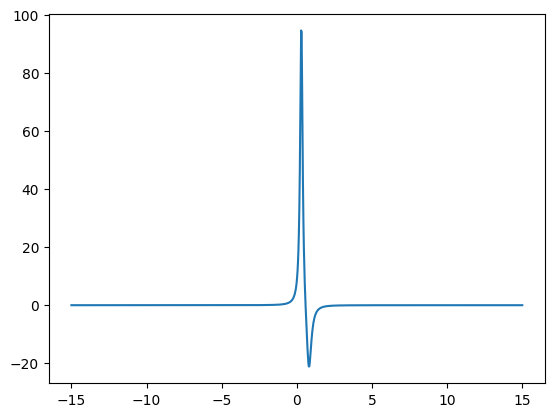

In [11]:
import matplotlib.pyplot as plt

ridder(f= func, a= -10, b= 10)

x = np.linspace(-15, 15, 1000)
y = func(x)

plt.plot(x, y)
plt.show()



## Método Newton-Raphson

El algoritmo de Newton-Raphson es el método más conocido para encontrar raíces, y es por una buena razón: es sencillo y rápido. El único inconveniente del método es que necesita la derivada $f'(x)$ además de la propia función $f(x)$. Por lo tanto, el método de Newton-Raphson solo puede utilizarse en problemas en los que $f'(x)$ pueda calcularse fácilmente.
 
La fórmula de Newton-Raphson puede deducirse de la expansión en serie de Taylor de $f(x)$ en torno a $x_n$:

$$
f\left(x_{n+1}\right)=f\left(x_n\right)+f^{\prime}\left(x_n\right)\left(x_{n+1} - x_n\right)+O\left(x_{n+1}-x_n\right)^2
$$

Si $x_{n+1}$ es una raíz de $f(x) = 0$, la ecuación anterior se convierte en

$$
0=f\left(x_n\right)+f^{\prime}\left(x_n\right)\left(x_{n+1}-x_n\right)+O\left(x_{n+1}-x_n\right)^2
$$

Suponiendo que $x_n$ es suficientemente próximo a $x_{n+1}$, podemos eliminar el último término de la ecuación anterior y resolver para $x_{n+1}$. El resultado es la fórmula Newton-Raphson:
 
$$
x_{n+1}=x_n-\frac{f\left(x_n\right)}{f^{\prime}\left(x_n\right)}
$$

La siguiente figura muestra la interpretación gráfica de la fórmula de Newton-Raphson:

<center>
<div>
<img src="https://drive.upm.es/index.php/apps/files_sharing/ajax/publicpreview.php?x=1920&y=465&a=true&file=newton.png&t=uyhJke7v4JouGe3&scalingup=0" width="320"/>
</div>
</center>

La fórmula aproxima localmente $f(x)$ por la línea recta que tangente a la curva en $x_n$. Así, $x_{n+1}$ se obtendrá como la intersección del eje $x$ con dicha recta tangente.

El algoritmo del método Newton-Raphson es sencillo: aplica repetidamente la ecuación anterior, comenzando con un valor inicial $x_0$, hasta satisfacer el siguiente criterio de convergencia

$$
\left|x_{n+1}-x_n\right|<\varepsilon
$$

siendo $\varepsilon$ la tolerancia del error. Solo hay que almacenar el último valor de $x$. Este es el algoritmo:

1. Sea $x$ una estimación de la raíz de $f(x)=0$
2. Repetir hasta que $\left| \Delta x \right| < \varepsilon$:
   - Calcular $\left| \Delta x \right| = - f(x) / f'(x)$
   - Hacer $x \leftarrow x + \Delta x$

Se puede demostrar que el método de Newton-Raphson converge cuadráticamente (el error en una iteración es del orden del cuadrado del error en la iteración anterior). Por tanto, el número de cifras significativas se duplica (aproximadamente) en cada iteración.

Aunque el método Newton-Raphson converge rápidamente cerca de la raíz, sus características de convergencia global son pobres. La razón es que la línea tangente no siempre es una aproximación aceptable de la función, como se ilustra en los ejemplos de la siguiente figura. La solución aquí suele ser combinar este método con alguno de los anteriores para aprovechar las ventajas de ambos.

<center>
<div>
<img src="https://drive.upm.es/index.php/apps/files_sharing/ajax/publicpreview.php?x=1920&y=465&a=true&file=newton_does_not_work.png&t=GW2Z25pZizkP9Jc&scalingup=0" width="550"/>
</div>
</center>


**Ejercicio 11 -** Programa una función que implemente el método de Newton-Raphson. Dicha función necesitará como argumentos a la función ```f``` a resolver, su derivada ```df```, un valor inicial ```x``` y una tolerancia objetivo ```tol```.

**Ejercicio 12 -** Utiliza el método de Newton-Raphson para encontrar aproximaciones sucesivas para $\sqrt{2}$. *Pista: piensa en la función $f(x) = x^2 - 2$*.

**Ejercicio 13 -** Observa la siguiente función y analiza si los métodos explicados anteriormente funcionarán para encontrar la primera raíz. 
$$
f(x)=x^4-6.4 x^3+6.45 x^2+20.538 x-31.752
$$

<center>
<div>
<img src="https://drive.upm.es/index.php/apps/files_sharing/ajax/publicpreview.php?x=1920&y=465&a=true&file=ej_newton.png&t=etX3pvzKDeiFQiK&scalingup=0" width="320"/>
</div>
</center>

Aplica los métodos que funcionen para calcularla, y compara su *performance*.